In [1]:
import os
import pandas as pd

# Define the path to the "data" folder
data_folder = "../raw_data/"

# List all files in the folder
all_files = os.listdir(data_folder)

# Filter only .tsv files
tsv_files = [f for f in all_files if f.endswith(".tsv")]

# Print found TSV files
print("📂 Found TSV files:", tsv_files)


📂 Found TSV files: ['gibs_ethics.tsv', 'gibbs_didactics.tsv', 'gibs_dundee.tsv', 'gibbs_swp_2022.tsv', 'fau_2-converted.tsv', 'gibs_swp.tsv', 'fau_1-converted.tsv']


In [2]:
import pandas as pd

file1 = os.path.join(data_folder, "fau_1-converted.tsv")
file2 = os.path.join(data_folder, "fau_2-converted.tsv")

df1 = pd.read_csv(file1, sep="\t")
df2 = pd.read_csv(file2, sep="\t")

In [3]:
# Select the requested columns
df1_selected_columns = ['class_id', 'student_id', 'sentence_id', 'sentence', 'TRANSLATION', 'gibbs']
df1_selected = df1[df1_selected_columns]
df2_selected_columns = ['class_id', 'student_id', 'sentence_id', 'sentence', 'Label']
df2_selected = df2[df2_selected_columns]


# fau_1

In [4]:
# Print shape and first few rows
print(f"📊 df1_selected Shape: {df1_selected.shape}")
df1_selected.head()

📊 df1_selected Shape: (1559, 6)


,class_id,student_id,sentence_id,sentence,TRANSLATION,gibbs
0,FAU,0,0,Zunächst habe ich meinen Arbeitsplatz vorberei...,""" First I prepared my workstation to be able...",0.0
1,FAU,0,1,Anschließend las ich das Fallbeispiel mehrmals...,""" Then I read through the case study several ...",0.0
2,FAU,0,2,Ich bin neutral und offen an die Aufgabe heran...,""" I approached the task neutrally and openly ...",1.0
3,FAU,0,3,Nachdem ich zunächst die Aufgabe ohne Lerninha...,""" After initially working on the task without...",0.0
4,FAU,0,4,"Die Tipps haben mir sehr geholfen, um meine Lö...",""" The tips helped me a lot to improve my solu...",2.0


In [5]:
# Filtering the DataFrame
filtered_df1 = df1_selected[df1_selected['gibbs'].isin({0, 1, 2, 3, 4, 5})]

# Print number of rows after filtering
print(f"Number of rows after filtering: {filtered_df1.shape[0]}")

# Define all possible gibbs values
gibbs_categories = {0, 1, 2, 3, 4, 5}

# Group by student_id and process the data
grouped_df = filtered_df1.groupby('student_id').agg({
    'TRANSLATION': lambda x: ' '.join(x),  # Concatenating text
    'gibbs': lambda x: {int(k): int(v) for k, v in x.value_counts().to_dict().items()}  # Convert keys/values to int
}).reset_index()

# Print number of rows after grouping
print(f"Number of rows after grouping: {grouped_df.shape[0]}")

# Ensure all keys (0-5) exist in each dictionary
def fill_missing_keys(counts_dict):
    return {key: counts_dict.get(key, 0) for key in gibbs_categories}

# Apply function to ensure all keys are present
grouped_df['gibbs_counts'] = grouped_df['gibbs'].apply(fill_missing_keys)

# Rename columns
grouped_df.rename(columns={'TRANSLATION': 'text'}, inplace=True)

grouped_df = grouped_df[['student_id', 'text', 'gibbs_counts']]

grouped_df.head()


Number of rows after filtering: 1557
Number of rows after grouping: 159


,student_id,text,gibbs_counts
0,0,""" First I prepared my workstation to be able...","{0: 3, 1: 2, 2: 1, 3: 1, 4: 2, 5: 0}"
1,1,""" Very motivated because I find class events...","{0: 2, 1: 0, 2: 6, 3: 3, 4: 0, 5: 1}"
2,2,""" Quite motivated class management and deali...","{0: 2, 1: 0, 2: 7, 3: 1, 4: 0, 5: 0}"
3,3,""" With regard to my upcoming pedagogical-dida...","{0: 2, 1: 4, 2: 4, 3: 3, 4: 2, 5: 0}"
4,4,""" Before working on the task I felt a little...","{0: 6, 1: 5, 2: 4, 3: 2, 4: 0, 5: 1}"


In [6]:
# Function to compute "hits" column
def compute_hits(gibbs_dict):
    return [1 if gibbs_dict[key] != 0 else 0 for key in [0, 1, 2, 3, 4, 5]]

# Apply function to create the "hits" column
grouped_df["hits"] = grouped_df["gibbs_counts"].apply(compute_hits)

grouped_df


,student_id,text,gibbs_counts,hits
0,0,""" First I prepared my workstation to be able...","{0: 3, 1: 2, 2: 1, 3: 1, 4: 2, 5: 0}","[1, 1, 1, 1, 1, 0]"
1,1,""" Very motivated because I find class events...","{0: 2, 1: 0, 2: 6, 3: 3, 4: 0, 5: 1}","[1, 0, 1, 1, 0, 1]"
2,2,""" Quite motivated class management and deali...","{0: 2, 1: 0, 2: 7, 3: 1, 4: 0, 5: 0}","[1, 0, 1, 1, 0, 0]"
3,3,""" With regard to my upcoming pedagogical-dida...","{0: 2, 1: 4, 2: 4, 3: 3, 4: 2, 5: 0}","[1, 1, 1, 1, 1, 0]"
4,4,""" Before working on the task I felt a little...","{0: 6, 1: 5, 2: 4, 3: 2, 4: 0, 5: 1}","[1, 1, 1, 1, 0, 1]"
...,...,...,...,...
154,154,""" I had a lot of fun completing it at first ...","{0: 2, 1: 0, 2: 7, 3: 3, 4: 2, 5: 0}","[1, 0, 1, 1, 1, 0]"
155,155,""" Reflection before the work phase: "" "" Reg...","{0: 6, 1: 0, 2: 2, 3: 1, 4: 2, 5: 0}","[1, 0, 1, 1, 1, 0]"
156,156,""" Prior to working on the practice assignment...","{0: 1, 1: 0, 2: 1, 3: 0, 4: 2, 5: 0}","[1, 0, 1, 0, 1, 0]"
157,157,""" Before the learning unit I had a hard time ...","{0: 0, 1: 0, 2: 3, 3: 0, 4: 2, 5: 0}","[0, 0, 1, 0, 1, 0]"


In [7]:
import textwrap

# Get the text for student_id = 0
text = grouped_df.loc[grouped_df['student_id'] == 5, 'text'].values[0]
hits = grouped_df.loc[grouped_df['student_id'] == 5, 'hits'].values[0]

print(hits)

# Print wrapped text (wraps at 80 characters per line)
print("\n".join(textwrap.wrap(text, width=80)))


[1, 0, 1, 1, 1, 0]
 " I set myself up for instruction on how to manage and situations problems and
classroom disruptions as a future teacher. "   " It only became clear to me
during this process how relevant "   " it is not only to intervene in retrospect
but also to define clear rules in advance in order to enable all students as
well as the teacher himself to teach and learn in a pleasant classroom climate.
"   " Finally  I must say that dealing with the issue of disruptions in the
classroom has shown me that there is no such thing as a disruption-free
classroom. "   " These must be mastered as a teacher only situationally  often
spontaneously and correctly  in order to grant the class climate for all. "   "
This thought has enriched me very much with regard to my hopefully future
practice as a teacher. "


In [8]:
import pandas as pd

# Convert 'gibbs_counts' dictionary column into a DataFrame
gibbs_distribution = pd.DataFrame(grouped_df['gibbs_counts'].tolist(), index=grouped_df['student_id'])

# Rename the index to match the second image format
gibbs_distribution.index.name = 'student_id'

# Sort columns to ensure order from 0 to 5
gibbs_distribution = gibbs_distribution[[0, 1, 2, 3, 4, 5]]

gibbs_distribution.head()

print(gibbs_distribution.shape)

# Sum all occurrences of each Gibbs category across students
gibbs_counts = gibbs_distribution.sum()

# Convert to DataFrame and rename columns
gibbs_counts_df = gibbs_counts.to_frame(name="count")

# Rename index to match expected format
gibbs_counts_df.index.name = "gibbs"

# Display result
print(gibbs_counts_df)


(159, 6)
       count
gibbs       
0        436
1         75
2        516
3        344
4        149
5         37


In [10]:
%pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 57.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
# Display result
filtered_df1

# Count occurrences of each value per student_id
gibbs_counts = filtered_df1.groupby('student_id')['gibbs'].value_counts().unstack(fill_value=0)

gibbs_counts.head()

gibbs,0.0,1.0,2.0,3.0,4.0,5.0
student_id,,,,,,
0,3,2,1,1,2,0
1,2,0,6,3,0,1
2,2,0,7,1,0,0
3,2,4,4,3,2,0
4,6,5,4,2,0,1


In [14]:
# Get the overall distribution of gibbs values
gibbs_distribution = filtered_df1['gibbs'].value_counts().sort_index()

gibbs_distribution

gibbs
0.0    436
1.0     75
2.0    516
3.0    344
4.0    149
5.0     37
Name: count, dtype: int64

# distrubtion of classes sentence level

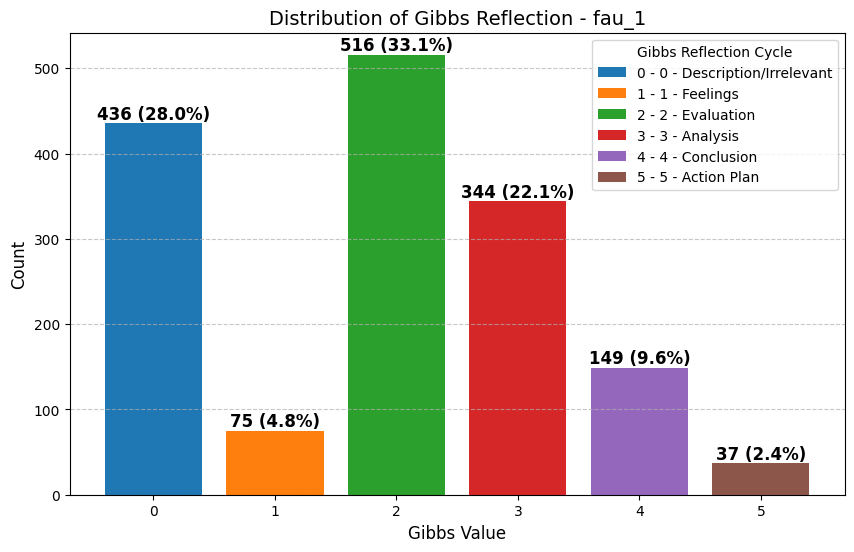

In [16]:
import matplotlib.pyplot as plt

# Create a mapping for gibbs values
gibbs_labels = {
    0: "0 - Description/Irrelevant",
    1: "1 - Feelings",
    2: "2 - Evaluation",
    3: "3 - Analysis",
    4: "4 - Conclusion",
    5: "5 - Action Plan"
}

# Compute total occurrences to get percentages
total_count = gibbs_counts_df["count"].sum()
gibbs_counts_df["percentage"] = (gibbs_counts_df["count"] / total_count) * 100

# Plot the distribution of gibbs values
plt.figure(figsize=(10, 6))
bars = plt.bar(gibbs_counts_df.index, gibbs_counts_df["count"], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Add text labels for each bar (count and percentage)
for bar, (count, pct) in zip(bars, zip(gibbs_counts_df["count"], gibbs_counts_df["percentage"])):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{int(count)} ({pct:.1f}%)",
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add legend mapping gibbs values to descriptions
legend_labels = [f"{key} - {label}" for key, label in gibbs_labels.items()]
plt.legend(bars, legend_labels, title="Gibbs Reflection Cycle", loc="upper right", fontsize=10)

# Formatting plot
plt.xlabel("Gibbs Value", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Gibbs Reflection - fau_1", fontsize=14)
plt.xticks(gibbs_counts_df.index)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


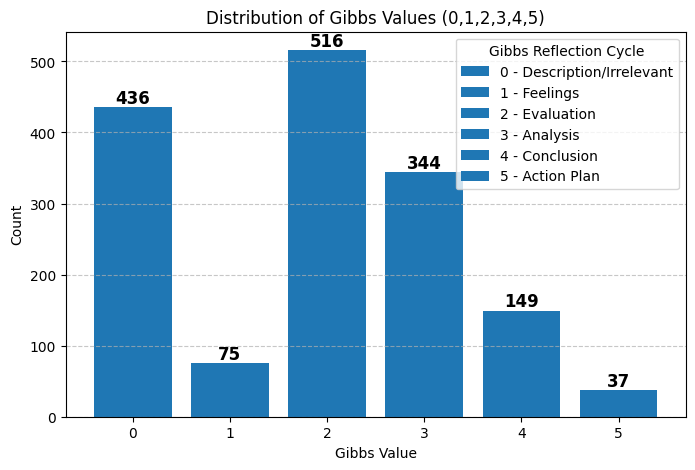

In [17]:
import matplotlib.pyplot as plt

# Create a mapping for gibbs values
gibbs_labels = {
    0: "0 - Description/Irrelevant",
    1: "1 - Feelings",
    2: "2 - Evaluation",
    3: "3 - Analysis",
    4: "4 - Conclusion",
    5: "5 - Action Plan"
}

# Plot the distribution of gibbs values
plt.figure(figsize=(8, 5))
bars = plt.bar(gibbs_distribution.index, gibbs_distribution.values)

# Add text labels for each bar
for bar in bars:
    height = bar.get_height()  # Get the bar height (count)
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)),
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add legend mapping gibbs values to descriptions
legend_labels = [gibbs_labels[val] for val in gibbs_distribution.index]
plt.legend(bars, legend_labels, title="Gibbs Reflection Cycle", loc="upper right")

plt.xlabel("Gibbs Value")
plt.ylabel("Count")
plt.title("Distribution of Gibbs Values (0,1,2,3,4,5)")
plt.xticks(gibbs_distribution.index)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [19]:
# Convert gibbs_counts dictionary column into a DataFrame
gibbs_counts_df = pd.DataFrame(grouped_df['gibbs_counts'].tolist(), index=grouped_df['student_id'])

# Compute percentage per text
gibbs_percentage_df = gibbs_counts_df.div(gibbs_counts_df.sum(axis=1), axis=0) * 100

# Merge percentage back into the main dataframe
grouped_df = grouped_df.merge(gibbs_percentage_df, on="student_id", suffixes=('', '_percentage'))

gibbs_percentage_df.head()



,0,1,2,3,4,5
student_id,,,,,,
0,33.333333,22.222222,11.111111,11.111111,22.222222,0.000000
1,16.666667,0.000000,50.000000,25.000000,0.000000,8.333333
2,20.000000,0.000000,70.000000,10.000000,0.000000,0.000000
3,13.333333,26.666667,26.666667,20.000000,13.333333,0.000000
4,33.333333,27.777778,22.222222,11.111111,0.000000,5.555556


# distrubtion of classes per student (paragraph level)

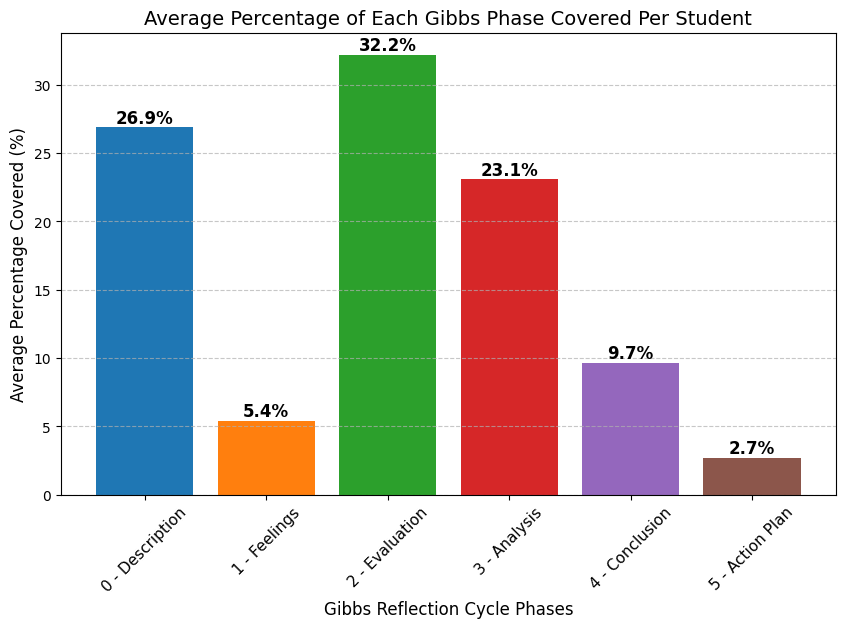

In [21]:
import matplotlib.pyplot as plt

# Compute the average percentage covered per Gibbs phase across all students
avg_gibbs_coverage = gibbs_percentage_df.mean()

# Define Gibbs phase labels
gibbs_labels = ["0 - Description", "1 - Feelings", "2 - Evaluation", "3 - Analysis", "4 - Conclusion", "5 - Action Plan"]

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(gibbs_labels, avg_gibbs_coverage, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.1f}%",
             ha='center', va='bottom', fontsize=12, fontweight="bold")

# Format plot
plt.xlabel("Gibbs Reflection Cycle Phases", fontsize=12)
plt.ylabel("Average Percentage Covered (%)", fontsize=12)
plt.title("Average Percentage of Each Gibbs Phase Covered Per Student", fontsize=14)
plt.xticks(rotation=45, fontsize=11)
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Show plot
plt.show()


In [22]:
# Print shape and first few rows
print(f"📊 df2_selected Shape: {df2_selected.shape}")
df2_selected.head()

📊 df2_selected Shape: (1519, 5)


,class_id,student_id,sentence_id,sentence,Label
0,FAU,0,0,Herangehensweise:\nÄhnlich wie bei der Bearbei...,0.0
1,FAU,0,1,Anschließend habe ich\nmir die Aufgabenstellun...,0.0
2,FAU,0,2,Im Gegensatz zu den Fragen zum Themenbereich 4...,0.0
3,FAU,0,3,Dies war\nverständlich beschrieben und stelle ...,2.0
4,FAU,0,4,Die erste\nFrage bezog sich allerdings ledigli...,2.0


# fau_2

In [24]:
# Remove rows where the 'gibbs' column is empty (NaN or blank)
df2_selected_cleaned = df2_selected.dropna(subset=['Label'])

# Print the new shape after removing empty rows
print(f"📊 New df2_selected Shape after removing empty 'gibbs' rows: {df2_selected_cleaned.shape}")

📊 New df2_selected Shape after removing empty 'gibbs' rows: (750, 5)


# gibbs_didactics

In [30]:
file3 = os.path.join(data_folder, "gibbs_didactics.tsv")

df3 = pd.read_csv(file3, sep="\t")
#df3.columns.tolist()

In [31]:
df3_selected_columns = ['coll_lecture', 'student_id', 'text_level', 'gibbs', 'question', 'translation', 'sentence']
df3_selected = df3[df3_selected_columns]

In [32]:
# Remove rows where the 'gibbs' column is empty (NaN or blank)
df3_selected_cleaned = df3_selected.dropna(subset=['gibbs'])

# Print the new shape after removing empty rows
print(f"📊 New df3_selected Shape after removing empty 'gibbs' rows: {df3_selected_cleaned.shape}")

📊 New df3_selected Shape after removing empty 'gibbs' rows: (1547, 7)


In [33]:
df3_selected_cleaned.head()

,coll_lecture,student_id,text_level,gibbs,question,translation,sentence
0,M6,7,0.0,0,5,Aim/competence: Analyze and build computer mod...,Ziel/Kompetenz: Informatische Modelle analysie...
1,M6,7,0.0,0,5,Topic: Forming a knowledge network from hashta...,Thema: Bilden eines Wissensnetzwerks aus Hasht...
2,M6,7,0.0,0,5,Topic: Databases (elective),Thema: Datenbanken (Wahlthemenfeld)
3,M6,7,0.0,0,2,Finding songs without lyrics or if you don't r...,Die Suche von Liedern ohne Lyrics bzw. falls m...
4,M6,7,0.0,0,2,"However, programming error messages that were ...","Programmierfehlernachrichten, die von der Such..."


# SWP DATA

In [34]:
file5 = os.path.join(data_folder, "gibbs_swp_2022.tsv")
file6 = os.path.join(data_folder, "gibs_swp.tsv")

df5 = pd.read_csv(file5, sep="\t")
df6 = pd.read_csv(file6, sep="\t")

df5.columns.tolist()

['coll_lecture',
 'collection',
 'text',
 's_id',
 'sentence',
 'english',
 'options gibbs',
 'new gibbs']

In [35]:
df5_selected_columns = ['coll_lecture',
 'collection',
 'text',
 's_id',
 'sentence',
 'english',
 'new gibbs']
df5_selected = df5[df5_selected_columns]

In [36]:
# Remove rows where the 'gibbs' column is empty (NaN or blank)
# df5_selected_cleaned = df5_selected.dropna(subset=['new gibbs'])
# # Ensure df5_selected is an independent copy before renaming
df5_selected = df5_selected.copy()

# Now rename the column safely
df5_selected.rename(columns={'new gibbs': 'gibbs'}, inplace=True)
df5_selected.shape
print(df5_selected["gibbs"].unique())
df5_selected.dtypes


[0 3 1 2 5 4]


coll_lecture    object
collection       int64
text             int64
s_id             int64
sentence        object
english         object
gibbs            int64
dtype: object

In [37]:
# Filtering the DataFrame
filtered_df5 = df5_selected[df5_selected['gibbs'].isin({0, 1, 2, 3, 4, 5})]

# Define all possible gibbs values
gibbs_categories = {0, 1, 2, 3, 4, 5}

# Group by student_id and process the data
grouped_df5 = filtered_df5.groupby('text').agg({
    'english': lambda x: ' '.join(x),  # Concatenating text
    'gibbs': lambda x: {int(k): int(v) for k, v in x.value_counts().to_dict().items()}  # Convert keys/values to int
}).reset_index()

# Ensure all keys (0-5) exist in each dictionary
def fill_missing_keys(counts_dict):
    return {key: counts_dict.get(key, 0) for key in gibbs_categories}

# Apply function to ensure all keys are present
grouped_df5['gibbs_counts'] = grouped_df5['gibbs'].apply(fill_missing_keys)

# Rename columns
grouped_df5.rename(columns={'text': 'student_id'}, inplace=True)
grouped_df5.rename(columns={'english': 'text'}, inplace=True)

grouped_df5 = grouped_df5[['student_id', 'text', 'gibbs_counts']]

grouped_df5.head()


,student_id,text,gibbs_counts
0,0,Why I am valuable in the team despite the funn...,"{0: 12, 1: 4, 2: 1, 3: 2, 4: 2, 5: 1}"
1,1,Project from VL ML4DataScientists had to do ev...,"{0: 1, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0}"
2,2,Today we had our second meeting. We distribute...,"{0: 3, 1: 1, 2: 2, 3: 1, 4: 2, 5: 0}"
3,3,"My favorite project was my bachelor thesis, in...","{0: 3, 1: 2, 2: 1, 3: 0, 4: 2, 5: 1}"
4,4,What went well: When I worked alone or with co...,"{0: 4, 1: 2, 2: 2, 3: 0, 4: 0, 5: 2}"


In [73]:
# Function to compute "hits" column
def compute_hits(gibbs_dict):
    return [1 if gibbs_dict[key] != 0 else 0 for key in [0, 1, 2, 3, 4, 5]]

# Apply function to create the "hits" column
grouped_df5["hits"] = grouped_df5["gibbs_counts"].apply(compute_hits)

grouped_df5.head()


,student_id,text,gibbs_counts,hits
0,0,Why I am valuable in the team despite the funn...,"{0: 12, 1: 4, 2: 1, 3: 2, 4: 2, 5: 1}","[1, 1, 1, 1, 1, 1]"
1,1,Project from VL ML4DataScientists had to do ev...,"{0: 1, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0}","[1, 0, 0, 1, 0, 0]"
2,2,Today we had our second meeting. We distribute...,"{0: 3, 1: 1, 2: 2, 3: 1, 4: 2, 5: 0}","[1, 1, 1, 1, 1, 0]"
3,3,"My favorite project was my bachelor thesis, in...","{0: 3, 1: 2, 2: 1, 3: 0, 4: 2, 5: 1}","[1, 1, 1, 0, 1, 1]"
4,4,What went well: When I worked alone or with co...,"{0: 4, 1: 2, 2: 2, 3: 0, 4: 0, 5: 2}","[1, 1, 1, 0, 0, 1]"


In [77]:
import textwrap

# Get the text for student_id = 0
text = grouped_df5.loc[grouped_df['student_id'] == 2, 'text'].values[0]
hits = grouped_df5.loc[grouped_df['student_id'] == 2, 'hits'].values[0]

print(hits)

# Print wrapped text (wraps at 80 characters per line)
print("\n".join(textwrap.wrap(text, width=80)))


[1, 1, 1, 1, 1, 0]
Today we had our second meeting. We distributed the topics and formed different
groups. I had thought a lot in advance and during the meeting which topic would
interest me but at the same time would not be too much work. It was a pleasant
atmosphere, but I still lacked some details about the exact topics, which is why
the meeting was exhausting. However, that's pretty normal since in such a large
group the individual questions/details always get lost a bit. I could have asked
more questions to change the whole thing, but overall I am quite satisfied as we
are only at the beginning. In the future, the details should be in smaller
(specialized) groups and only occasionally in the very large group. This is also
in line with the current schedule. I am excited to see what the future holds.


In [63]:
import pandas as pd

# Convert 'gibbs_counts' dictionary column into a DataFrame
gibbs_distribution = pd.DataFrame(grouped_df5['gibbs_counts'].tolist(), index=grouped_df5['student_id'])

# Rename the index to match the second image format
gibbs_distribution.index.name = 'student_id'

# Sort columns to ensure order from 0 to 5
gibbs_distribution = gibbs_distribution[[0, 1, 2, 3, 4, 5]]

gibbs_distribution.head()

print(gibbs_distribution.shape)

# Sum all occurrences of each Gibbs category across students
gibbs_counts = gibbs_distribution.sum()

# Convert to DataFrame and rename columns
gibbs_counts_df = gibbs_counts.to_frame(name="count")

# Rename index to match expected format
gibbs_counts_df.index.name = "gibbs"

# Display result
print(gibbs_counts_df)


(40, 6)
       count
gibbs       
0        103
1         23
2         33
3         88
4         27
5         14


# Graph 2

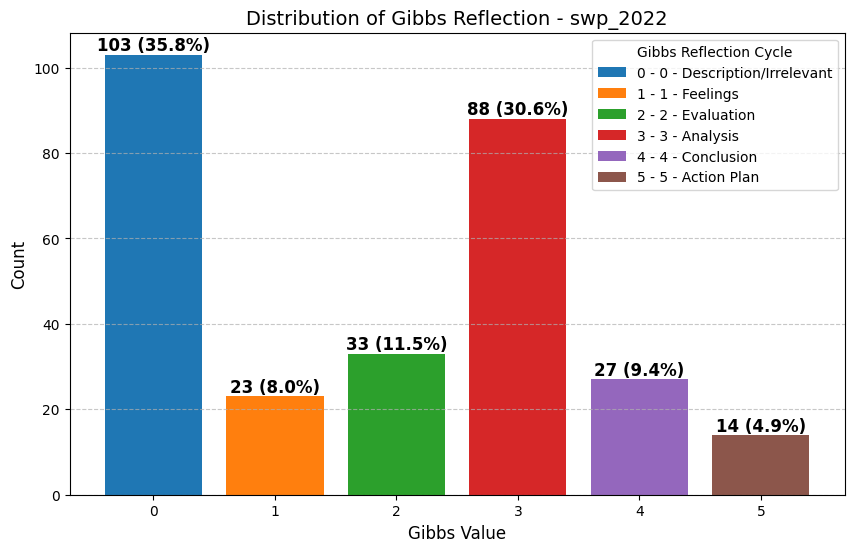

In [51]:
import matplotlib.pyplot as plt

# Create a mapping for gibbs values
gibbs_labels = {
    0: "0 - Description/Irrelevant",
    1: "1 - Feelings",
    2: "2 - Evaluation",
    3: "3 - Analysis",
    4: "4 - Conclusion",
    5: "5 - Action Plan"
}

# Compute total occurrences to get percentages
total_count = gibbs_counts_df["count"].sum()
gibbs_counts_df["percentage"] = (gibbs_counts_df["count"] / total_count) * 100

# Plot the distribution of gibbs values
plt.figure(figsize=(10, 6))
bars = plt.bar(gibbs_counts_df.index, gibbs_counts_df["count"], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Add text labels for each bar (count and percentage)
for bar, (count, pct) in zip(bars, zip(gibbs_counts_df["count"], gibbs_counts_df["percentage"])):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{int(count)} ({pct:.1f}%)",
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add legend mapping gibbs values to descriptions
legend_labels = [f"{key} - {label}" for key, label in gibbs_labels.items()]
plt.legend(bars, legend_labels, title="Gibbs Reflection Cycle", loc="upper right", fontsize=10)

# Formatting plot
plt.xlabel("Gibbs Value", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Gibbs Reflection - swp_2022", fontsize=14)
plt.xticks(gibbs_counts_df.index)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert gibbs_counts dictionary column into a DataFrame
gibbs_counts_df = pd.DataFrame(grouped_df5['gibbs_counts'].tolist(), index=grouped_df5['student_id'])

# Compute percentage per text
gibbs_percentage_df = gibbs_counts_df.div(gibbs_counts_df.sum(axis=1), axis=0) * 100

# Merge percentage back into the main dataframe
grouped_df5 = grouped_df5.merge(gibbs_percentage_df, on="student_id", suffixes=('', '_percentage'))

gibbs_percentage_df.head()



,0,1,2,3,4,5
student_id,,,,,,
0,54.545455,18.181818,4.545455,9.090909,9.090909,4.545455
1,50.000000,0.000000,0.000000,50.000000,0.000000,0.000000
2,33.333333,11.111111,22.222222,11.111111,22.222222,0.000000
3,33.333333,22.222222,11.111111,0.000000,22.222222,11.111111
4,40.000000,20.000000,20.000000,0.000000,0.000000,20.000000


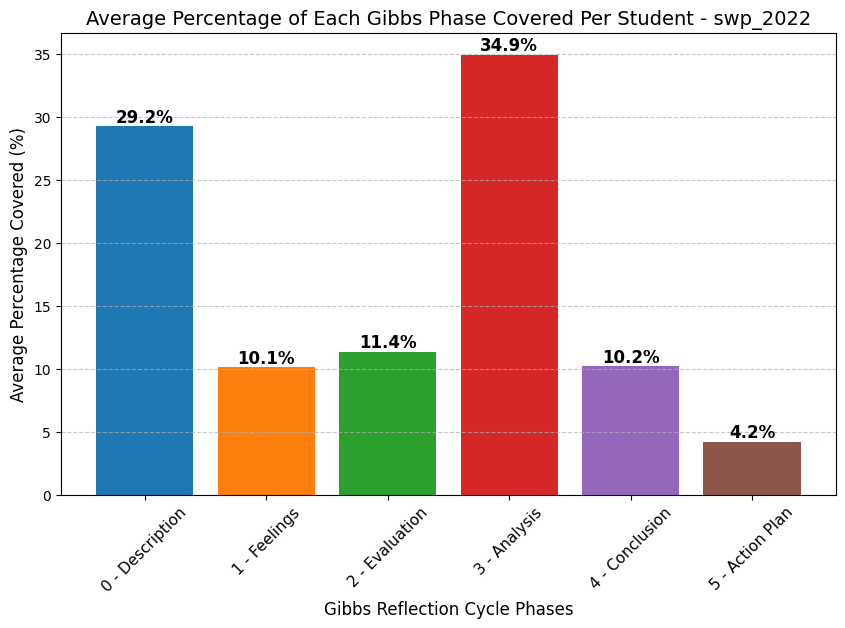

In [58]:
import matplotlib.pyplot as plt

# Compute the average percentage covered per Gibbs phase across all students
avg_gibbs_coverage = gibbs_percentage_df.mean()

# Define Gibbs phase labels
gibbs_labels = ["0 - Description", "1 - Feelings", "2 - Evaluation", "3 - Analysis", "4 - Conclusion", "5 - Action Plan"]

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(gibbs_labels, avg_gibbs_coverage, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.1f}%",
             ha='center', va='bottom', fontsize=12, fontweight="bold")

# Format plot
plt.xlabel("Gibbs Reflection Cycle Phases", fontsize=12)
plt.ylabel("Average Percentage Covered (%)", fontsize=12)
plt.title("Average Percentage of Each Gibbs Phase Covered Per Student - swp_2022", fontsize=14)
plt.xticks(rotation=45, fontsize=11)
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Show plot
plt.show()


In [23]:
df6.columns.tolist()

['coll_lecture',
 'coll_session',
 'subj',
 'text_id',
 'sentence',
 'sentences english',
 'gibs',
 'label_ref',
 'sentiment',
 'gibbs',
 'gibbs.1']

In [6]:
df6_selected_columns = ['coll_lecture',
 'coll_session',
 'subj',
 'text_id',
 'sentence',
 'sentences english',
 'gibbs.1']
df6_selected = df6[df6_selected_columns]

# Ensure df6_selected is an independent copy before renaming
df6_selected = df6_selected.copy()

# Now rename the column safely
df6_selected.rename(columns={'gibbs.1': 'gibbs'}, inplace=True)

# Display updated column names
print(df6_selected.columns)



Index(['coll_lecture', 'coll_session', 'subj', 'text_id', 'sentence',
       'sentences english', 'gibbs'],
      dtype='object')


In [7]:
print(df6_selected["gibbs"].unique())


['0' '1' '2' '3' '5' '4' '2022-04-03 00:00:00' '2022-03-02 00:00:00']


In [12]:
import pandas as pd

# Ensure we work on a copy to avoid warnings
df6_selected = df6_selected.copy()

# Convert "gibbs.1" to string and remove spaces
df6_selected["gibbs"] = df6_selected["gibbs"].astype(str).str.strip()

# Keep only numeric values (0-5), remove dates and unwanted values
valid_values = {'0', '1', '2', '3', '4', '5'}
df6_selected = df6_selected[df6_selected["gibbs"].isin(valid_values)].copy()

# Convert gibbs.1 to integer safely
df6_selected["gibbs"] = df6_selected["gibbs"].astype(int)

# Rename "gibbs.1" to "gibbs"
df6_selected.rename(columns={"gibbs": "gibbs"}, inplace=True)

# Verify result
print(df6_selected.dtypes)
print(df6_selected["gibbs"].unique())  # Should only contain [0, 1, 2, 3, 4, 5]

df6_selected

coll_lecture         object
coll_session          int64
subj                  int64
text_id               int64
sentence             object
sentences english    object
gibbs                 int64
dtype: object
[0 1 2 3 5 4]


,coll_lecture,coll_session,subj,text_id,sentence,sentences english,gibbs
0,swp,2,1,0,ich keine erfahrung in projekarbeiten und auch...,i have no experience in project work and also ...,0
1,swp,2,2,0,"Gutes Team, Interessantes","Good team, interesting",1
2,swp,2,2,0,"Projekt, remote, mehrmals pro woche, weil es s...","Project, remote, several times a week, because...",1
3,swp,2,3,0,Viel organisatorisches,A lot of organizational stuff,0
4,swp,2,4,0,"Infrastrucktur eingerichtet, Zeitplan erstellt...","Infrastructure set up, schedule created, knowl...",0
...,...,...,...,...,...,...,...
499,swp,4,2,4,Ich glaube da bin ich eigentlich gut im Bilde.,I think I'm actually well in the picture.,2
500,swp,4,0,5,Häufig frustriert und genervt.,Often frustrated and annoyed.,1
501,swp,4,0,5,Aber auch ab und zu stolz oder Spaß beim coden.,But also occasionally proud or fun to code.,1
502,swp,4,1,5,Ich bin mit den Ergebnissen zufrieden und habe...,I'm happy with the results and more confident ...,2


In [13]:
# Filtering the DataFrame
filtered_df6 = df6_selected[df6_selected['gibbs'].isin({0, 1, 2, 3, 4, 5})]

# Define all possible gibbs values
gibbs_categories = {0, 1, 2, 3, 4, 5}

# Group by student_id and process the data
grouped_df6 = filtered_df6.groupby('text_id').agg({
    'sentences english': lambda x: ' '.join(x),  # Concatenating text
    'gibbs': lambda x: {int(k): int(v) for k, v in x.value_counts().to_dict().items()}  # Convert keys/values to int
}).reset_index()

# Ensure all keys (0-5) exist in each dictionary
def fill_missing_keys(counts_dict):
    return {key: counts_dict.get(key, 0) for key in gibbs_categories}

# # Apply function to ensure all keys are present
# grouped_df['gibbs_counts'] = grouped_df['gibbs'].apply(fill_missing_keys)

# # Rename columns
# grouped_df.rename(columns={'TRANSLATION': 'text'}, inplace=True)

# grouped_df = grouped_df[['student_id', 'text', 'gibbs_counts']]

grouped_df6


,text_id,sentences english,gibbs
0,0,i have no experience in project work and also ...,"{0: 59, 2: 33, 1: 15, 3: 8, 4: 1}"
1,1,Project planning still reading in got insights...,"{0: 47, 2: 25, 1: 9, 4: 9, 5: 8, 3: 6}"
2,2,data sourcing keep up with others because my l...,"{2: 38, 0: 34, 1: 11, 3: 5, 4: 5, 5: 1}"
3,3,afraid to ask stupid and obvious questions all...,"{2: 25, 0: 23, 1: 8, 3: 6, 5: 4, 4: 2}"
4,4,See above. I now have more confidence in my ab...,"{2: 26, 0: 20, 3: 4, 1: 3, 5: 2}"
5,5,"Likewise, here is still to wait for the next f...","{1: 43, 2: 12, 0: 5, 3: 2, 5: 1, 4: 1}"


In [ ]:


# Display result
filtered_df1

# Count occurrences of each value per student_id
gibbs_counts = filtered_df1.groupby('student_id')['gibbs'].value_counts().unstack(fill_value=0)

gibbs_counts

import matplotlib.pyplot as plt

# Get the overall distribution of gibbs values
gibbs_distribution = filtered_df1['gibbs'].value_counts().sort_index()

gibbs_distribution

In [25]:
# Remove rows where the 'gibbs' column is empty (NaN or blank)
df6_selected_cleaned = df6_selected.dropna(subset=['gibbs.1'])

df6_selected_cleaned.shape

(504, 7)

In [26]:
df6_selected_cleaned

,coll_lecture,coll_session,subj,text_id,sentence,sentences english,gibbs.1
0,swp,2,1,0,ich keine erfahrung in projekarbeiten und auch...,i have no experience in project work and also ...,0
1,swp,2,2,0,"Gutes Team, Interessantes","Good team, interesting",1
2,swp,2,2,0,"Projekt, remote, mehrmals pro woche, weil es s...","Project, remote, several times a week, because...",1
3,swp,2,3,0,Viel organisatorisches,A lot of organizational stuff,0
4,swp,2,4,0,"Infrastrucktur eingerichtet, Zeitplan erstellt...","Infrastructure set up, schedule created, knowl...",0
...,...,...,...,...,...,...,...
499,swp,4,2,4,Ich glaube da bin ich eigentlich gut im Bilde.,I think I'm actually well in the picture.,2
500,swp,4,0,5,Häufig frustriert und genervt.,Often frustrated and annoyed.,1
501,swp,4,0,5,Aber auch ab und zu stolz oder Spaß beim coden.,But also occasionally proud or fun to code.,1
502,swp,4,1,5,Ich bin mit den Ergebnissen zufrieden und habe...,I'm happy with the results and more confident ...,2


In [3]:
file7 = os.path.join(data_folder, "gibs_dundee.tsv")
file8 = os.path.join(data_folder, "gibs_ethics.tsv")

df7 = pd.read_csv(file7, sep="\t")
df8 = pd.read_csv(file8, sep="\t")

df7.columns.tolist()

['class_id',
 'student_id',
 'question_id',
 'sentence',
 'translation',
 'Unnamed: 5',
 'label_ref',
 'label_sent',
 'gibbs',
 'Unnamed: 9']

# Dundee - Computer Science

In [30]:
df7_selected_columns = ['class_id',
 'student_id',
 'question_id',
 'sentence',
 'translation',
 'gibbs']
df7_selected = df7[df7_selected_columns]

# Remove rows where the 'gibbs' column is empty (NaN or blank)
df7_selected_cleaned = df7_selected.dropna(subset=['gibbs'])

print(df7_selected_cleaned.shape)
df7_selected_cleaned.head()
print(df7_selected_cleaned.dtypes)
print(df7_selected_cleaned["gibbs"].unique())

(3595, 6)
class_id       object
student_id      int64
question_id     int64
sentence       object
translation    object
gibbs          object
dtype: object
['2' '3' '0' '5' '4' '1' '2021-04-02 00:00:00']


In [48]:
# Convert the gibbs column to numeric, forcing errors to NaN for non-convertible values
df7_selected_cleaned['gibbs'] = pd.to_numeric(df7_selected_cleaned['gibbs'], errors='coerce')

# Now filter the dataframe
filtered_df7 = df7_selected_cleaned[df7_selected_cleaned['gibbs'].isin([0, 1, 2, 3, 4, 5])]

# print(filtered_df7["gibbs"].unique())

print(filtered_df7.shape)

gibbs_categories = {0, 1, 2, 3, 4, 5}

# Group by student_id and process the data
grouped_df7 = filtered_df7.groupby('student_id').agg({
    'translation': lambda x: ' '.join(x),  # Concatenating text
    'gibbs': lambda x: {int(k): int(v) for k, v in x.value_counts().to_dict().items()}  # Convert keys/values to int
}).reset_index()


# Ensure all keys (0-5) exist in each dictionary
def fill_missing_keys(counts_dict):
    return {key: counts_dict.get(key, 0) for key in gibbs_categories}

# Apply function to ensure all keys are present
grouped_df7['gibbs_counts'] = grouped_df7['gibbs'].apply(fill_missing_keys)

# Rename columns
grouped_df7.rename(columns={'translation': 'text'}, inplace=True)

grouped_df7 = grouped_df7[['student_id', 'text', 'gibbs_counts']]

# Function to compute "hits" column
def compute_hits(gibbs_dict):
    return [1 if gibbs_dict[key] != 0 else 0 for key in [0, 1, 2, 3, 4, 5]]

# Apply function to create the "hits" column
grouped_df7["hits"] = grouped_df7["gibbs_counts"].apply(compute_hits)

# print(grouped_df7.head())


import textwrap

# Get the text for student_id = 0
text = grouped_df7.loc[grouped_df7['student_id'] == 29, 'text'].values[0]
hits = grouped_df7.loc[grouped_df7['student_id'] == 29, 'hits'].values[0]
count = grouped_df7.loc[grouped_df7['student_id'] == 29, 'gibbs_counts'].values[0]

print(hits)

# Print wrapped text (wraps at 80 characters per line)
print("\n".join(textwrap.wrap(text, width=80)))


print(grouped_df7.shape)

(3594, 6)
[1, 0, 1, 1, 1, 1]
Currently, I am ambivalent about lesson planning. Part of me enjoys the
creativity of coming up with ideas that will (hopefully) engage and inspire
learners, while the other part finds it very challenging to figure out how those
ideas will work in practice. Of course, I realize that this will get easier with
time, and also when I am planning for a class with real children, rather than
hypothetically as I have been doing. With this in mind, I tried to complete the
Language TDT while thinking about the Elementary 5 class I will be working with
in the practicum. Our task was to create a lesson plan based on a children's
book that would meet the following objectives:  I can: Discuss structure,
characterization, and/or setting Identify the relevance of the author's theme
and how it relates to my own and others' experiences Discuss the author's style
and other characteristics appropriate to the genre. The novel I chose for this
lesson plan is the wonderful: The L

In [49]:
import pandas as pd

# Convert 'gibbs_counts' dictionary column into a DataFrame
gibbs_distribution = pd.DataFrame(grouped_df7['gibbs_counts'].tolist(), index=grouped_df7['student_id'])

# Rename the index to match the second image format
gibbs_distribution.index.name = 'student_id'

# Sort columns to ensure order from 0 to 5
gibbs_distribution = gibbs_distribution[[0, 1, 2, 3, 4, 5]]

gibbs_distribution.head()

print(gibbs_distribution.shape)

# Sum all occurrences of each Gibbs category across students
gibbs_counts = gibbs_distribution.sum()

# Convert to DataFrame and rename columns
gibbs_counts_df = gibbs_counts.to_frame(name="count")

# Rename index to match expected format
gibbs_counts_df.index.name = "gibbs"

# Display result
print(gibbs_counts_df)


(118, 6)
       count
gibbs       
0       1394
1        129
2       1002
3        634
4        173
5        262


## Dundee Graph - count distr

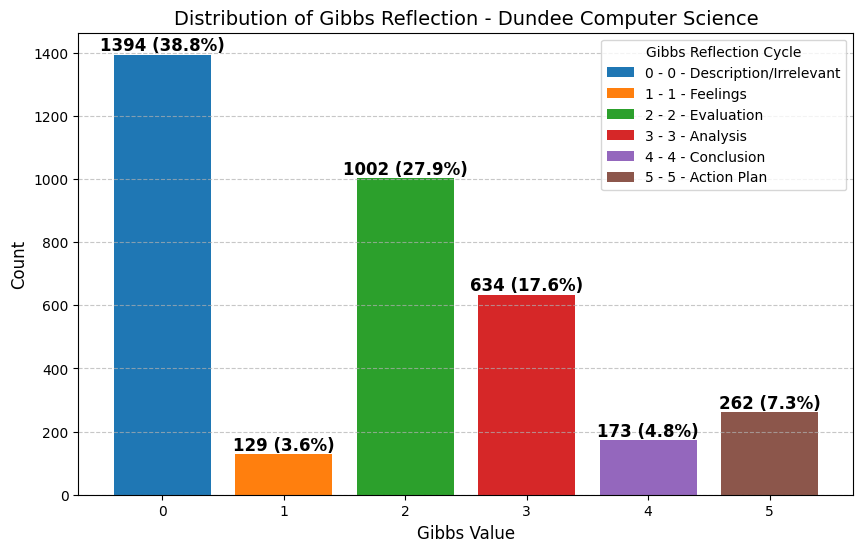

In [50]:
import matplotlib.pyplot as plt

# Create a mapping for gibbs values
gibbs_labels = {
    0: "0 - Description/Irrelevant",
    1: "1 - Feelings",
    2: "2 - Evaluation",
    3: "3 - Analysis",
    4: "4 - Conclusion",
    5: "5 - Action Plan"
}

# Compute total occurrences to get percentages
total_count = gibbs_counts_df["count"].sum()
gibbs_counts_df["percentage"] = (gibbs_counts_df["count"] / total_count) * 100

# Plot the distribution of gibbs values
plt.figure(figsize=(10, 6))
bars = plt.bar(gibbs_counts_df.index, gibbs_counts_df["count"], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Add text labels for each bar (count and percentage)
for bar, (count, pct) in zip(bars, zip(gibbs_counts_df["count"], gibbs_counts_df["percentage"])):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{int(count)} ({pct:.1f}%)",
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add legend mapping gibbs values to descriptions
legend_labels = [f"{key} - {label}" for key, label in gibbs_labels.items()]
plt.legend(bars, legend_labels, title="Gibbs Reflection Cycle", loc="upper right", fontsize=10)

# Formatting plot
plt.xlabel("Gibbs Value", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Gibbs Reflection - Dundee Computer Science", fontsize=14)
plt.xticks(gibbs_counts_df.index)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert gibbs_counts dictionary column into a DataFrame
gibbs_counts_df = pd.DataFrame(grouped_df7['gibbs_counts'].tolist(), index=grouped_df7['student_id'])

# Compute percentage per text
gibbs_percentage_df = gibbs_counts_df.div(gibbs_counts_df.sum(axis=1), axis=0) * 100

# Merge percentage back into the main dataframe
grouped_df7 = grouped_df7.merge(gibbs_percentage_df, on="student_id", suffixes=('', '_percentage'))

gibbs_percentage_df.head()


,0,1,2,3,4,5
student_id,,,,,,
11,26.086957,4.347826,21.739130,26.086957,21.739130,0.000000
12,41.379310,13.793103,17.241379,10.344828,13.793103,3.448276
13,41.772152,1.265823,26.582278,10.126582,0.000000,20.253165
14,60.714286,0.000000,21.428571,3.571429,3.571429,10.714286
15,28.571429,0.000000,25.000000,39.285714,7.142857,0.000000


## Dundee graph 1 - per student dist

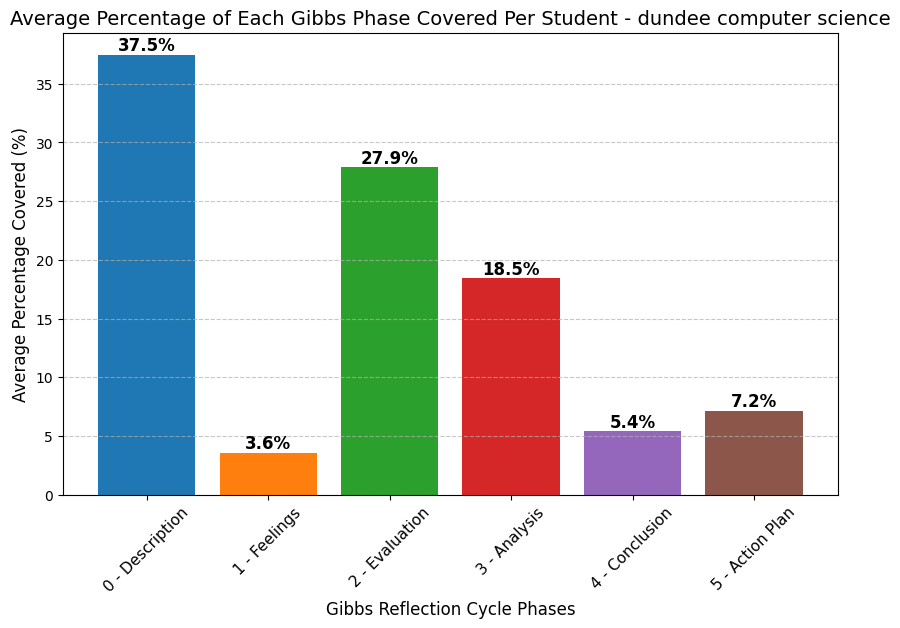

In [53]:
import matplotlib.pyplot as plt

# Compute the average percentage covered per Gibbs phase across all students
avg_gibbs_coverage = gibbs_percentage_df.mean()

# Define Gibbs phase labels
gibbs_labels = ["0 - Description", "1 - Feelings", "2 - Evaluation", "3 - Analysis", "4 - Conclusion", "5 - Action Plan"]

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(gibbs_labels, avg_gibbs_coverage, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.1f}%",
             ha='center', va='bottom', fontsize=12, fontweight="bold")

# Format plot
plt.xlabel("Gibbs Reflection Cycle Phases", fontsize=12)
plt.ylabel("Average Percentage Covered (%)", fontsize=12)
plt.title("Average Percentage of Each Gibbs Phase Covered Per Student - dundee computer science", fontsize=14)
plt.xticks(rotation=45, fontsize=11)
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Show plot
plt.show()


# Ethics Data

In [12]:
df8_selected_columns = ['coll_lecture',
 'coll_session',
 'subj',
 'text_id',
 'sentence',
 'sentence.1',
 'final']
df8_selected = df8[df8_selected_columns]

df8_selected = df8_selected.copy()

# Now rename the column safely
df8_selected.rename(columns={'final': 'gibbs'}, inplace=True)
# df8_selected.shape

# Remove rows where the 'gibbs' column is empty (NaN or blank)
df8_selected = df8_selected.dropna(subset=['gibbs'])

# Filtering the DataFrame
filtered_df8 = df8_selected[df8_selected['gibbs'].isin({0, 1, 2, 3, 4, 5})]

# print(df8_selected["gibbs"].unique())

# df8_selected.dtypes

# Define all possible gibbs values
gibbs_categories = {0, 1, 2, 3, 4, 5}

# Group by student_id and process the data
grouped_df8 = filtered_df8.groupby('text').agg({
    'english': lambda x: ' '.join(x),  # Concatenating text
    'gibbs': lambda x: {int(k): int(v) for k, v in x.value_counts().to_dict().items()}  # Convert keys/values to int
}).reset_index()

# Ensure all keys (0-5) exist in each dictionary
def fill_missing_keys(counts_dict):
    return {key: counts_dict.get(key, 0) for key in gibbs_categories}

# Apply function to ensure all keys are present
grouped_df5['gibbs_counts'] = grouped_df5['gibbs'].apply(fill_missing_keys)

# Rename columns
grouped_df5.rename(columns={'text': 'student_id'}, inplace=True)
grouped_df5.rename(columns={'english': 'text'}, inplace=True)

grouped_df5 = grouped_df5[['student_id', 'text', 'gibbs_counts']]

grouped_df5.head()





# df8_selected_cleaned.shape

,0
coll_lecture,object
coll_session,int64
subj,int64
text_id,int64
sentence,object
sentence.1,object
gibbs,float64


In [18]:
import textwrap

# Filter the dataframe where subj is 0
filtered_text = df8[df8['subj'] == 0]['sentence.1']

# Combine the text into a single string
combined_text = ' '.join(filtered_text.dropna())  # Drop NaN values before joining

# Print the wrapped text with a specified width (e.g., 80 characters)
print(textwrap.fill(combined_text, width=80))


About the WEKA exercise: Weka in itself is intuitive, so I could understand the
application well. In fact, I had some difficulties with the transformation of my
optimized folder structure for a suitable (unbiased) training set into the .arff
format (especially since the corresponding Python script is in French and I
don't know French). After some training with the help of Google and a ML-
Learning student who agreed to help me, I was then able to solve the task
without any prior programming knowledge. I tried to solve the first two tasks,
which was on April 24 and 25. I familiarized myself with ethical approaches that
should be considered when we use classifiers to make decisions I already know
Weka and it was easy to deal with the task for me, even I shared my knowledge
with teammates in the breakout session, but when it comes to discussing why this
CV was rejected or not, reasoning and brainstorming are difficult. Maybe the
main cause is that I focus too much on technical things and 